In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
#First, we need to import the dataset
df = pd.read_csv("Datasets/area.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


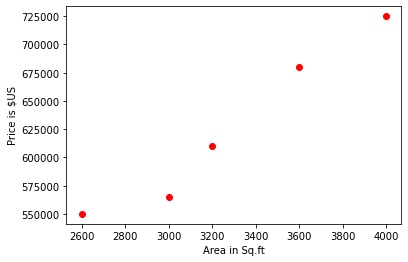

In [3]:
#let us understand the relattion between the area and price by plotting a graph
plt.xlabel("Area in Sq.ft")
plt.ylabel("Price is $US")
plt.scatter(df.area, df.price, color = "red")

#In the graph, we see that with increase in area, the price is also increasing
#It means, we can represent area and price using a linear equation
# y = mx + c --> m is independent variable (area in our case) and y is dependent variable (price in our case) and c is the intercept


In [4]:
#Now, lets find out the mathematical relation between area and price using linear regression
reg = linear_model.LinearRegression()

In [5]:
#reg.fit(independent variable, dependent variable)
reg.fit(df[["area"]],df.price)

LinearRegression()

In [6]:
#let us check the coefficient value (m) and the intercept value (c)
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
#Now, lets try to give an area value as input and let the function predict the price
reg.predict([[2500]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([520085.61643836])

In [9]:
#Below is the math behind the reg.predict function
area = 2500
price = 135.78767123*area + 180616.43835616432
price

520085.6164311643

In [10]:
#Let us now input a csv file with multiple area values and predict the prices for each of them at a time
df1 = pd.read_csv("Datasets/areas.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [12]:
#Let us use the reg.predict function and pass the above dataframe as input
price = reg.predict(df1)

In [13]:
df1["price"] = price
df1

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
#Let us now export this prediction csv to our local machine. Let us remove the index column as we dont need it
df1.to_csv("Datasets/Prediction.csv", index = False)

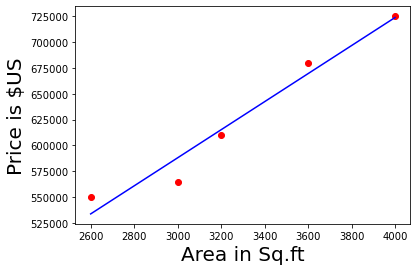

In [22]:
#Let us plot the graph for the predict fuction vs the original area vs price values
#
plt.xlabel("Area in Sq.ft", fontsize = 20)
plt.ylabel("Price is $US", fontsize = 20)
plt.scatter(df.area, df.price, color = "red")
plt.plot(df.area, reg.predict(df[['area']]), color = "blue")